In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Importing CSV file
df = pd.read_csv('/home/eric/Documents/datascience-class/Assignment_10/KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [55]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [56]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [57]:
df.shape

(1143, 11)

In [58]:
df_copy = df.copy()

In [59]:
df_copy.shape

(1143, 11)

In [60]:
df_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [61]:
# Checking for null values
df_copy.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [62]:
# checking for null values
df_duplicates = df_copy.duplicated().sum()
df_duplicates

0

In [63]:
#Isolating categorical columns
categorical = []
for column in df_copy.columns:
    if df_copy[column].dtypes == 'object':
        categorical.append(column)
categorical

['age', 'gender']

In [64]:
df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [65]:
df['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

In [66]:
# Dummy encoding the categorical columns
encoded_data_df = pd.get_dummies(df_copy[['age', 'gender']])
encoded_data_df

,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1
...,...,...,...,...,...,...
1138,0,0,0,1,1,0
1139,0,0,0,1,1,0
1140,0,0,0,1,1,0
1141,0,0,0,1,1,0


In [238]:
#df_copy = pd.concat([df_copy, encoded], axis=1)
#df_copy.head()

In [67]:
X = encoded_data_df

In [68]:
X.head()

,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1


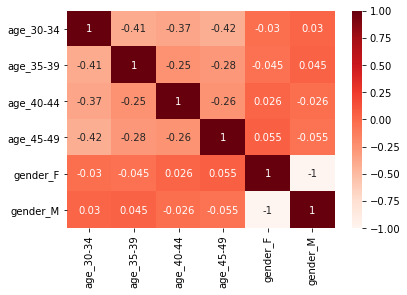

In [69]:
# Showing correlation using a heatmap
plt.figure
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [70]:
X.drop(['age_30-34', 'age_35-39', 'age_40-44', 'age_45-49'], axis = 1, inplace = True)
X.head()

,gender_F,gender_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [106]:
df_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


The above columns were dropped since their correlation is very low. 

In [113]:
df_copy = df_copy.drop(['age'], axis=1)
df_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_type
0,708746,916,103916,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,M,20,693,0,0.00,1,0,1
3,708815,916,103928,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,M,28,4133,1,1.29,1,1,1


In [114]:
df_copy = df_copy.drop(['gender'], axis=1)
df_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_type
0,708746,916,103916,15,7350,1,1.43,2,1,1
1,708749,916,103917,16,17861,2,1.82,2,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1


In [115]:
#Q4. Elbow method Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
scaler.fit(df_copy)
normalized_data = scaler.transform(df_copy)

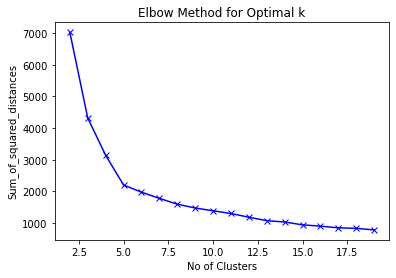

In [117]:
#Q4b.
# Applying elbow method 
K = range(2, 20)
Sum_of_squared_distances = []
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(normalized_data)
  Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [118]:
#Q5.
km = KMeans(n_clusters=5)
clusters = km.fit(X)

In [119]:
clusters

KMeans(n_clusters=5)

In [120]:
#Q6. 
y_means = km.fit_predict(normalized_data)

In [121]:
y_means

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [122]:
#Q7.
df_copy['Advert_type'] = y_means

In [124]:
df_copy.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_type
0,708746,916,103916,15,7350,1,1.43,2,1,0
1,708749,916,103917,16,17861,2,1.82,2,0,0
2,708771,916,103920,20,693,0,0.00,1,0,0
3,708815,916,103928,28,4259,1,1.25,1,0,0
4,708818,916,103928,28,4133,1,1.29,1,1,0


In [84]:
#Q8
# a. which advert type lead to the highest and consistent amount of sales by customers of al the age brackets

In [131]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [125]:
df_copy['Advert_type'].value_counts()

0    518
1    420
4     98
3     81
2     26
Name: Advert_type, dtype: int64

In [134]:
import plotly.express as px
fig = px.histogram(x=df_copy['Advert_type'], y=df['age'], nbins=10)
fig.show()

Based on the data the advert type for the age group 30-34 is the highest, followed by the 45-49

In [136]:
#Q8b.
import plotly.express as px
fig = px.histogram(x=df['gender'], y=df_copy['Spent'])
fig.show()

The company spends more on advertising on the gender female as inidicated in the graph above. 
Also it seems the female gender do lots of purchases.

In [223]:
#Q9. Hierarchical clustering
df_copy2 = df.copy()
df_copy2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [224]:
encoded = pd.get_dummies(df_copy2[['age', 'gender']])
encoded.head()

,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1


In [225]:
df_copy2 = pd.concat([df_copy2, encoded], axis=1)
df_copy2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1,0,0,0,0,1


In [228]:
##df_copy2.drop(['age', 'gender'], axis=1, inplace=True)

In [229]:
X = X = df_copy2.drop(['Approved_Conversion'], axis=1)
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,0,0,0,0,1


In [230]:
y = df_copy2[['Approved_Conversion']]
y.head()

,Approved_Conversion
0,1
1,0
2,0
3,0
4,1


In [231]:
#Scaling the values X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
normalized_Xdata = scaler.transform(X)
normalized_Xdata

array([[-1.43632663, -1.24516442, -1.45759092, ..., -0.5412822 ,
        -0.96475035,  0.96475035],
       [-1.43631116, -1.24516442, -1.45754212, ..., -0.5412822 ,
        -0.96475035,  0.96475035],
       [-1.4361977 , -1.24516442, -1.45739572, ..., -0.5412822 ,
        -0.96475035,  0.96475035],
       ...,
       [ 1.68714534,  0.90986308,  2.2543676 , ...,  1.84746513,
         1.03653758, -1.03653758],
       [ 1.68715566,  0.90986308,  2.2544652 , ...,  1.84746513,
         1.03653758, -1.03653758],
       [ 1.68716082,  0.90986308,  2.254514  , ...,  1.84746513,
         1.03653758, -1.03653758]])

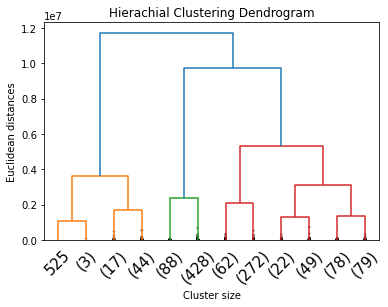

<Figure size 720x504 with 0 Axes>

In [232]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
linked = sch.linkage(X, method = 'ward')
dendrogram = sch.dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.title('Hierachial Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Euclidean distances')
plt.figure(figsize=(10, 7))
plt.show()

In [233]:
k = 3

In [234]:
import sklearn 
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.21609798775153105

In [ ]:
# cluster  = 2
k = 2
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

In [237]:
k = 4
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.0831146106736658

Using a cluster of 2 is favourable since it is the highest as compared above. 